**Importing Libraries**

In [66]:
import nltk
import numpy as np
import pandas as pd
import random
import string # to process standard python strings
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import matplotlib.dates as mdates
from datetime import datetime
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn import datasets

In [67]:
f=open('/content/dataset.csv','r',errors = 'ignore')
raw=f.read()
raw=raw.lower()# converts to lowercase
nltk.download('punkt') # first-time use only
nltk.download('wordnet') # first-time use only
sent_tokens = nltk.sent_tokenize(raw)# converts to list of sentences
word_tokens = nltk.word_tokenize(raw)# converts to list of words
print("Raw Text:")
print(raw)
print("\nSentence Tokens:")

print(sent_tokens)
print("\nWord Tokens:")
print(word_tokens)


Raw Text:
id	year_birth	education	marital_status	income	kidhome	teenhome	dt_customer	recency	mntwines	mntfruits	mntmeatproducts	mntfishproducts	mntsweetproducts	mntgoldprods	numdealspurchases	numwebpurchases	numcatalogpurchases	numstorepurchases	numwebvisitsmonth	acceptedcmp3	acceptedcmp4	acceptedcmp5	acceptedcmp1	acceptedcmp2	complain	z_costcontact	z_revenue	response
5524	1957	graduation	single	58138	0	0	04-09-2012	58	635	88	546	172	88	88	3	8	10	4	7	0	0	0	0	0	0	3	11	1
2174	1954	graduation	single	46344	1	1	08-03-2014	38	11	1	6	2	1	6	2	1	1	2	5	0	0	0	0	0	0	3	11	0
4141	1965	graduation	together	71613	0	0	21-08-2013	26	426	49	127	111	21	42	1	8	2	10	4	0	0	0	0	0	0	3	11	0
6182	1984	graduation	together	26646	1	0	10-02-2014	26	11	4	20	10	3	5	2	2	0	4	6	0	0	0	0	0	0	3	11	0
5324	1981	phd	married	58293	1	0	19-01-2014	94	173	43	118	46	27	15	5	5	3	6	5	0	0	0	0	0	0	3	11	0
7446	1967	master	together	62513	0	1	09-09-2013	16	520	42	98	0	42	14	2	6	4	10	6	0	0	0	0	0	0	3	11	0
965	1971	graduation	divorced	55635	0

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [68]:
lemmer = nltk.stem.WordNetLemmatizer()
#WordNet is a semantically-oriented dictionary of English included in NLTK.
def LemTokens(tokens):
    return [lemmer.lemmatize(token) for token in tokens]
remove_punct_dict = dict((ord(punct), None) for punct in string.punctuation)
def LemNormalize(text):
    return LemTokens(nltk.word_tokenize(text.lower().translate(remove_punct_dict)))

In [69]:
GREETING_INPUTS = ("hello", "hi", "greetings", "sup", "what's up", "hey")
GREETING_RESPONSES = ["hi", "hey", "nods", "hi there", "hello", "I am glad! You are talking to me"]

def greeting(sentence):
    return random.choice(GREETING_RESPONSES) if any(word.lower() in GREETING_INPUTS for word in sentence.split()) else None

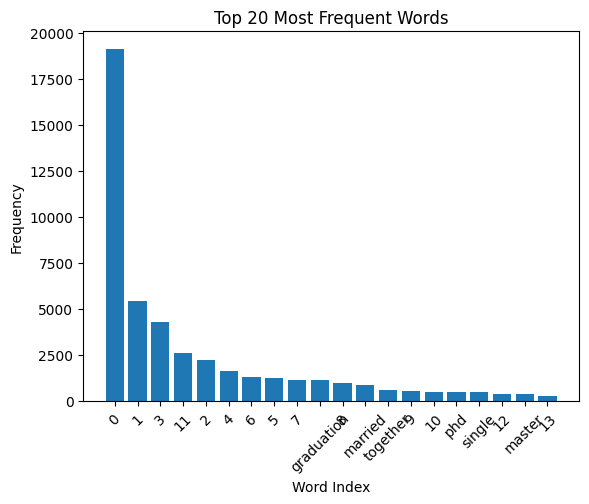

In [70]:
# Get the top 20 most frequent words
top_words = nltk.FreqDist(word_tokens).most_common(20)

# Create a bar chart
plt.bar(range(len(top_words)), [freq for word, freq in top_words])
plt.xlabel('Word Index')
plt.ylabel('Frequency')
plt.title('Top 20 Most Frequent Words')
plt.xticks(range(len(top_words)), [word for word, freq in top_words], rotation=45)

# Show the plot
plt.show()

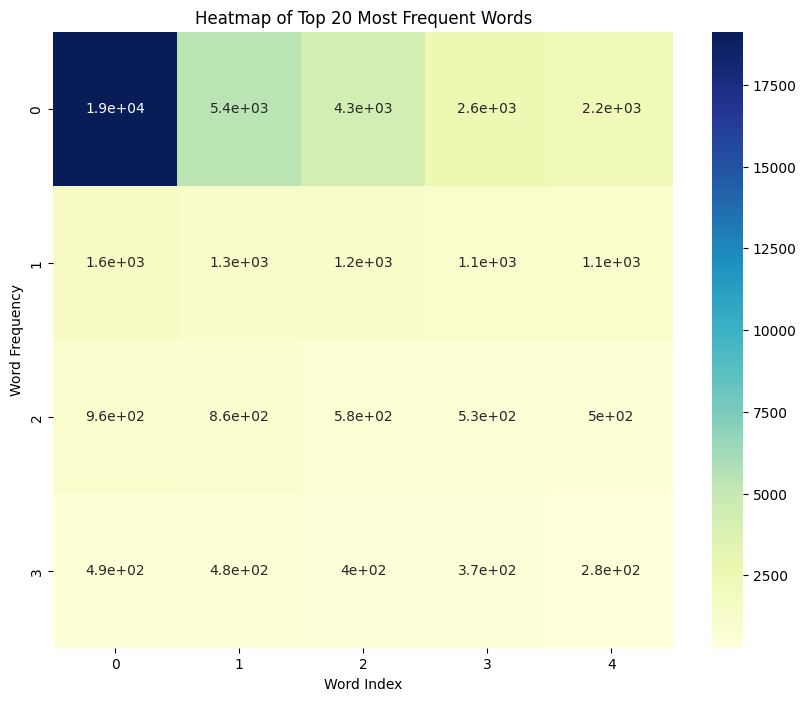

In [71]:
# Create a frequency distribution of the word tokens
word_freq = Counter(word_tokens)

# Create a DataFrame from the word frequency distribution
df = pd.DataFrame(list(word_freq.items()), columns=['Word', 'Frequency'])

# Sort the DataFrame by frequency in descending order
df = df.sort_values(by='Frequency', ascending=False)

# Select the top 20 most frequent words
top_20_words = df.head(20)

# Create a heatmap of the top 20 most frequent words
plt.figure(figsize=(10, 8))
sns.heatmap(top_20_words.set_index('Word')['Frequency'].values.reshape(4, 5), annot=True, cmap="YlGnBu")
plt.xlabel('Word Index')
plt.ylabel('Word Frequency')
plt.title('Heatmap of Top 20 Most Frequent Words')
plt.show()

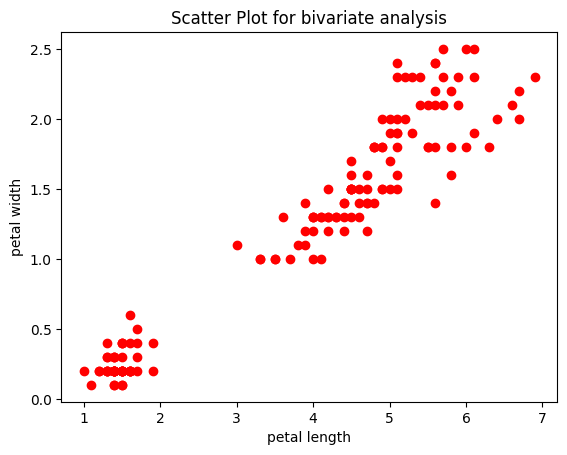

In [72]:
# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data[:, 2:]  # We only take the last two features: petal length and petal width
y = iris.target

# Create the scatter plot
plt.scatter(X[:, 0], X[:, 1], c='red')  # 'c' specifies the color

# Add labels and title
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.title('Scatter Plot for bivariate analysis')

# Display the plot
plt.show()